In [36]:
# Importando las librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Código usado para importar datos a google colab
from google.colab import files
files.upload()

**FIRST LOOK**

---



In [8]:
# Cargando el archivo importado, viendo las dos primeras instancias
# sus dimensiones y el tipo de datos que contiene
data_raw=pd.read_csv("heart.csv")
print("Las primeras instancias del dataset son:")
print(data_raw.head(5).to_string())
print("\n Las dimensiones del dataset son", data_raw.shape)

Las primeras instancias del dataset son:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0

 Las dimensiones del dataset son (918, 12)


In [58]:
print("Tipos de datos del dataset, de dimensiones", data_raw.shape)
data_raw.dtypes
# Se verifico que la data era balanceada

Tipos de datos del dataset, de dimensiones (918, 12)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [55]:
# Separammos las variables numericas de las no numericas
num_cols = data_raw._get_numeric_data().columns

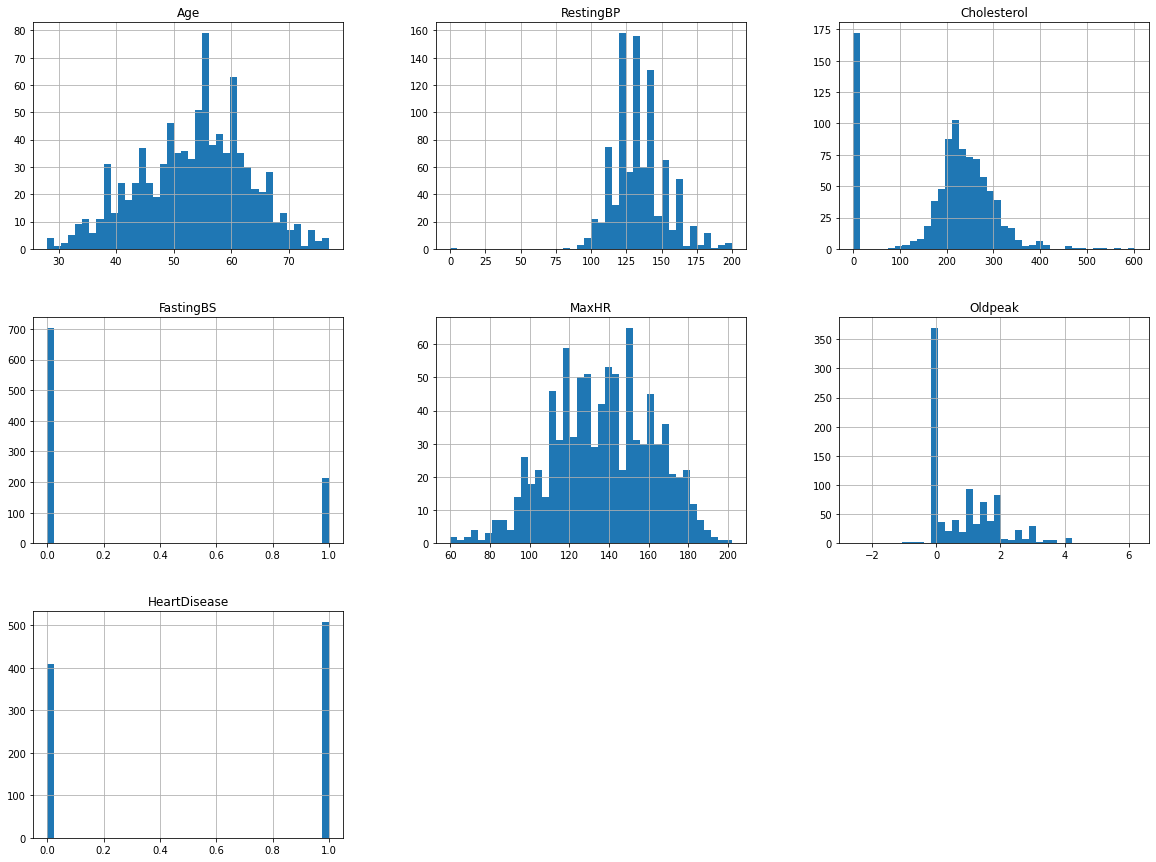

In [14]:
# Previsualización de variables numericas para ver distribuciones
# además obtenemos estadisticos de cada variable
data_raw[num_cols].hist(bins=40, figsize=(20,15))
plt.show()

In [28]:
print("Numerical Data" )
data_raw[num_cols].describe(include="all").T

Numerical Data


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [59]:
# para la data no numerica obtenemes la frecuencia de valores comunes.
cat_feat=["Female","Male","ASY","ATA","NAP","TA","LVH","NORMAL","ST","N","S","Down","Flat","Up"]
nn = data_raw.describe(include="O").columns
for i in nn:
  print(i ,"\n", data_raw[i].unique(), "\n")

Sex 
 ['M' 'F'] 

ChestPainType 
 ['ATA' 'NAP' 'ASY' 'TA'] 

RestingECG 
 ['Normal' 'ST' 'LVH'] 

ExerciseAngina 
 ['N' 'Y'] 

ST_Slope 
 ['Up' 'Flat' 'Down'] 



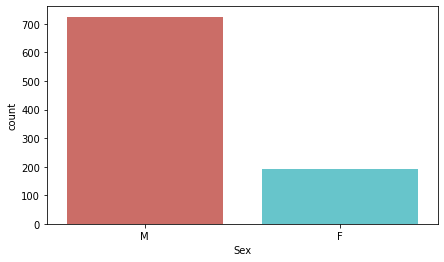

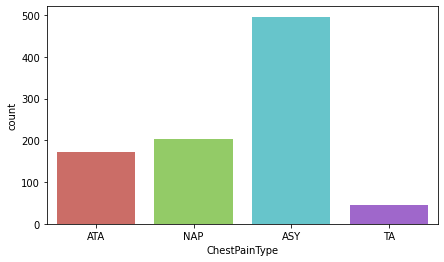

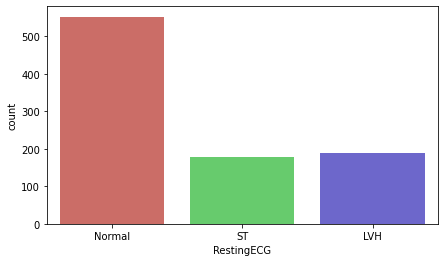

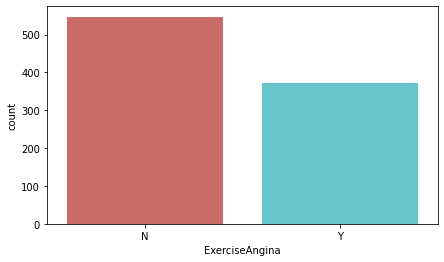

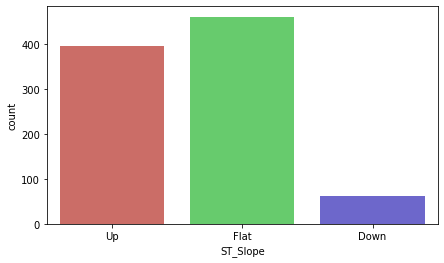

In [41]:
for i in nn:
  plt.figure(figsize=(7,4))
  sns.countplot(data_raw[i] ,palette="hls")
  plt.show()

**CLEANING THE DATA**

---



In [93]:
df=data_raw.copy()

In [94]:
# Como observamos anteriormente en los datos de colesterol se encontraba un grupo
# atípico así que revisaremos sus caracteristicas
print("El numero de valores diferentes en cholesterol menores de 70 es:", df[df['Cholesterol']<70]['Cholesterol'].nunique())
df[df['Cholesterol']<70].describe()
# Se encontró que los valores eran 0, no corresponden con valores reales por lo que 
# se asume que se trataron de valores perdidos.
# De igual forma en Oldpeak se encuentran algunos datos negativos
print("El numero de valores menores que 0 en Oldpeak es: ", df[df['Oldpeak']<0]['Oldpeak'].nunique())

El numero de valores diferentes en cholesterol menores de 70 es: 1
El numero de valores menores que 0 en Oldpeak es:  10


In [99]:
# Como los valores representaban menos del 20% de la data y aún eliminandolos
# tendriamos un volumen considerable para trabajar, aquí se elimina ese grupo
df=df[df['Cholesterol']>70]
# Similar para el caso de Oldpeak valores negativos parecen no tener un significado
# médico real por lo que se consideran outliers y se eliminan (son solo 13 datos).
df=df[df['Oldpeak']>=0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,745.0,52.906040,9.489625,28.0,46.0,54.0,59.0,77.0
RestingBP,745.0,133.036242,17.290451,92.0,120.0,130.0,140.0,200.0
Cholesterol,745.0,244.747651,59.113689,85.0,208.0,237.0,275.0,603.0
FastingBS,745.0,0.167785,0.373927,0.0,0.0,0.0,0.0,1.0
MaxHR,745.0,140.209396,24.536108,69.0,122.0,140.0,160.0,202.0
Oldpeak,745.0,0.902953,1.072953,0.0,0.0,0.5,1.5,6.2
HeartDisease,745.0,0.477852,0.499845,0.0,0.0,0.0,1.0,1.0


In [100]:
# Separamos la data en dos grupos disease y no disease y obtenemos valores estadisticos.
disease=df[df["HeartDisease"]==1]
notdisease=df[df["HeartDisease"]==0]
print("Heart disease data")
disease.describe().T

Heart disease data


,count,mean,std,min,25%,50%,75%,max
Age,356.0,55.851124,8.820768,31.0,50.00,57.0,62.00,77.0
RestingBP,356.0,136.154494,17.963226,92.0,123.75,136.0,145.00,200.0
Cholesterol,356.0,251.061798,62.462713,100.0,212.00,246.0,283.25,603.0
FastingBS,356.0,0.230337,0.421641,0.0,0.00,0.0,0.00,1.0
MaxHR,356.0,130.550562,22.299377,71.0,115.00,130.0,147.00,195.0
Oldpeak,356.0,1.457865,1.148383,0.0,0.50,1.5,2.00,6.2
HeartDisease,356.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [97]:
print("No Heart disease data")
notdisease.describe().T

No Heart disease data


,count,mean,std,min,25%,50%,75%,max
Age,389.0,50.210797,9.287048,28.0,43.0,51.0,56.0,76.0
RestingBP,389.0,130.182519,16.153743,94.0,120.0,130.0,140.0,190.0
Cholesterol,389.0,238.969152,55.324899,85.0,203.0,232.0,269.0,564.0
FastingBS,389.0,0.110540,0.313965,0.0,0.0,0.0,0.0,1.0
MaxHR,389.0,149.048843,23.140543,69.0,135.0,150.0,167.0,202.0
Oldpeak,389.0,0.395116,0.678082,0.0,0.0,0.0,0.6,4.2
HeartDisease,389.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


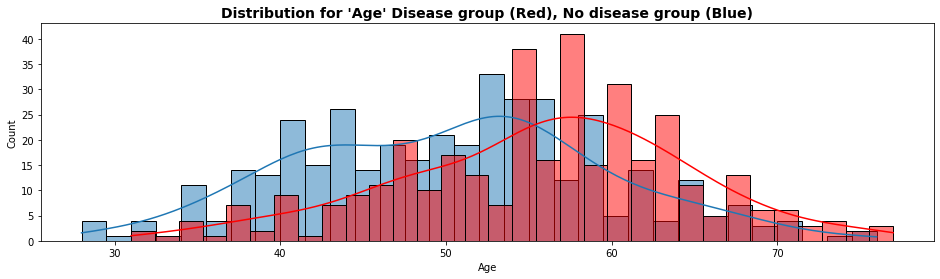

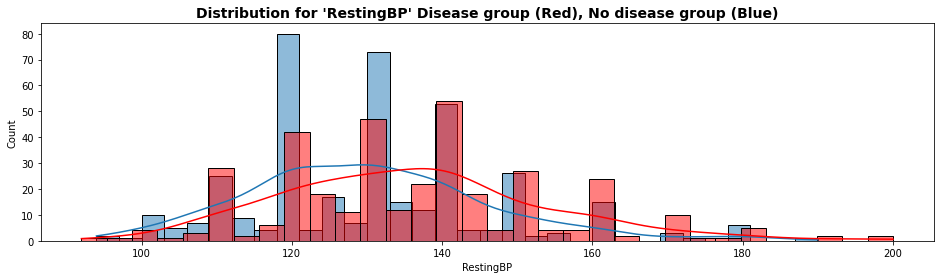

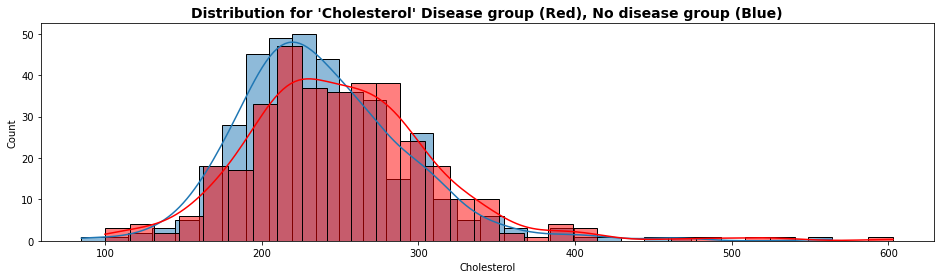

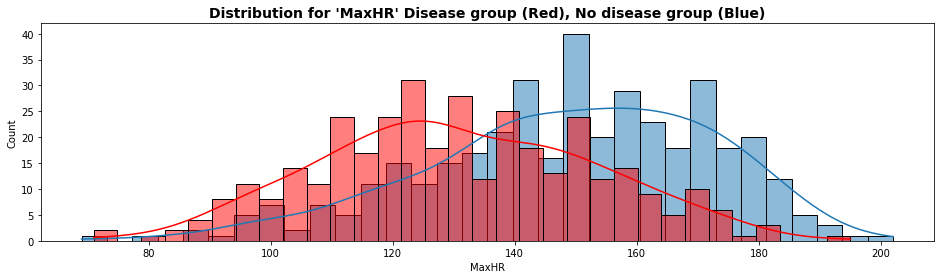

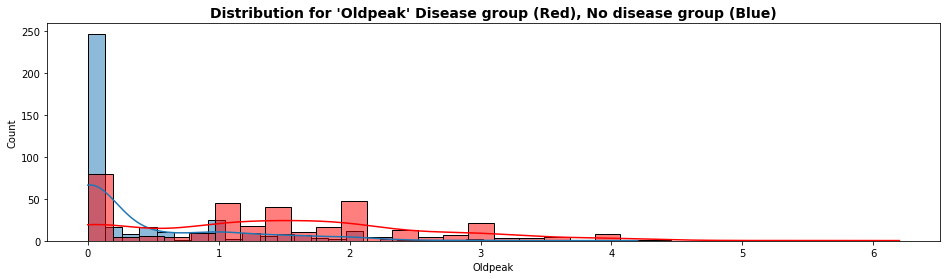

In [140]:
# Se realiza nuevamente visualizaciónes comparando ambos grupos
tags=["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
for c in tags:
    plt.figure(figsize=(16,4))
    ax = sns.histplot(notdisease[c],bins=32, kde=True)
    ax = sns.histplot(disease[c],color="red",bins=32 , kde=True)
    ax.set_title(f"Distribution for '{c}' Disease group (Red), No disease group (Blue)",size=14, fontweight='bold')
    plt.show()

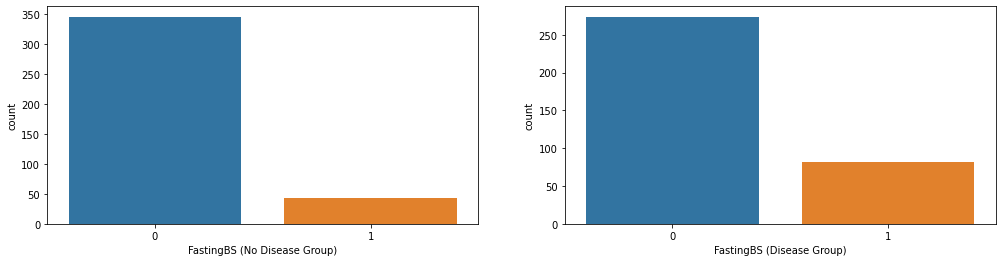

In [138]:
plt. figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.countplot(notdisease["FastingBS"])
plt.xlabel("FastingBS (No Disease Group)")
plt.subplot(1,2,2)
sns.countplot(disease["FastingBS"])
plt.xlabel("FastingBS (Disease Group)")
plt.show()

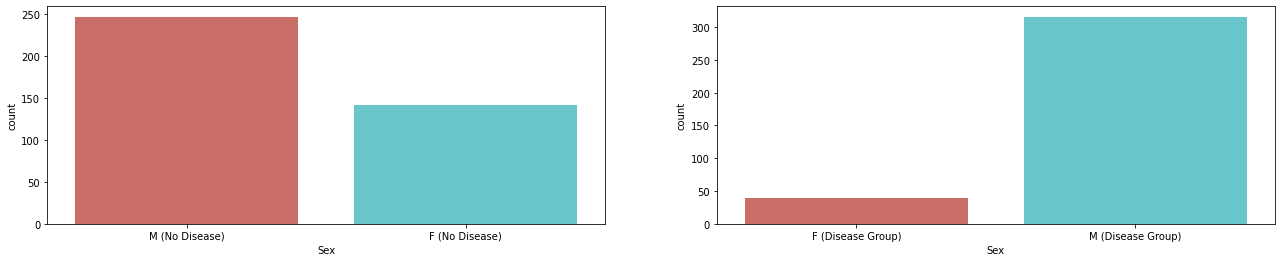

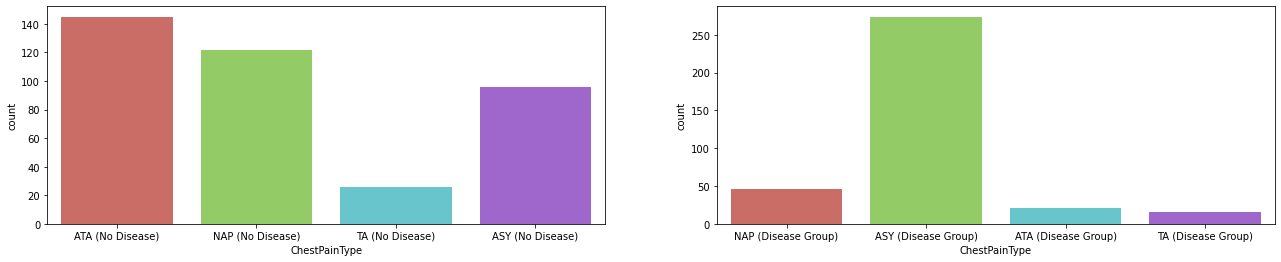

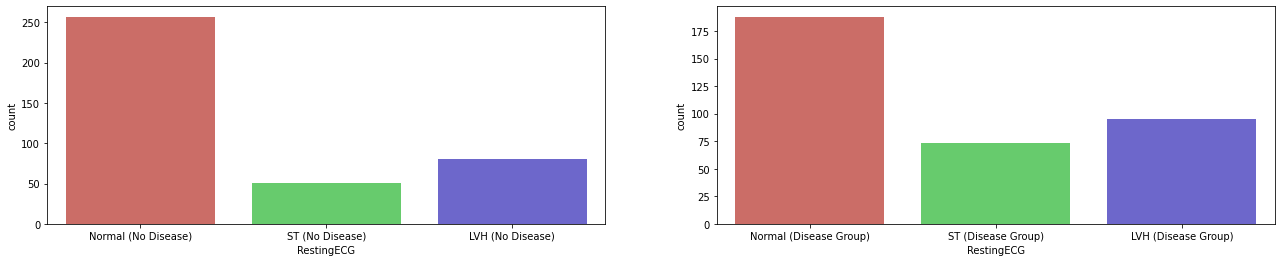

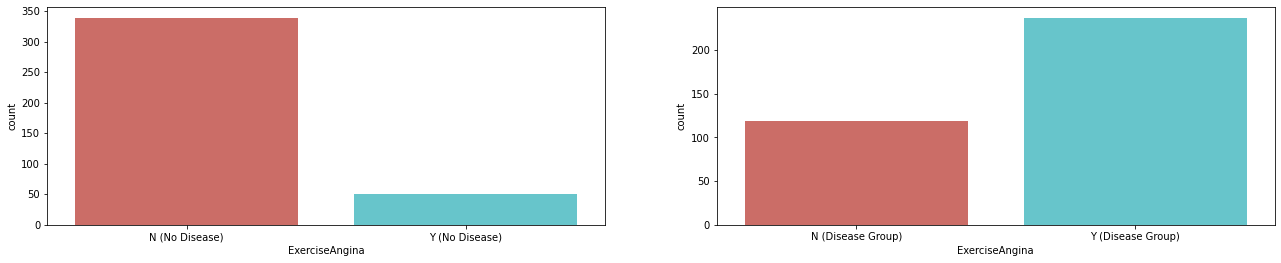

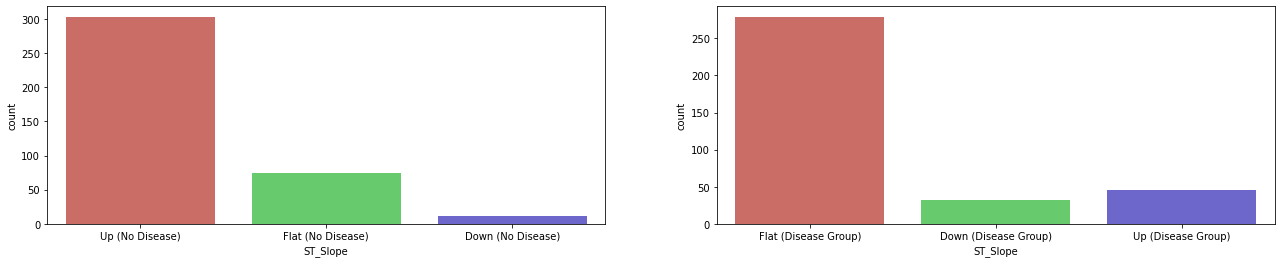

In [118]:
for i in nn:
  plt.figure(figsize=(22,4))
  plt.subplot(121)
  sns.countplot(notdisease[i]+" (No Disease)" ,palette="hls")
  plt.subplot(122)
  sns.countplot(disease[i]+" (Disease Group)" ,palette="hls")
  plt.show()

In [141]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder()

In [142]:
ct = make_column_transformer(
    (ohe, nn),  # apply OneHotEncoder to Embarked and Sex
    remainder='passthrough')     # include remaining columns in the output
ind=["Female","Male","ASY","ATA","NAP","TA","LVH","NORMAL","ST","N","S","Down",
     "Flat","Up",'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease']

In [143]:
df_enc=ct.fit_transform(df)
df_enc=pd.DataFrame(df_enc)
df_enc.columns=ind
df_enc.head()

,Female,Male,ASY,ATA,NAP,TA,LVH,NORMAL,ST,N,S,Down,Flat,Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0


In [144]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**MODELING DATA**

---



In [179]:
# Seleccionamos la data para entrenar el modelo
y=df_enc["HeartDisease"]
X=df_enc.iloc[:,0:20]
print(y.shape, X.shape)
# Nota : Otro grupo de variables que presentaron resultados favorables en 
# el entrenamiento del algoritmo fueron
# ["ChestPainType","MaxHR","ExerciseAngina","ST_Slope","Cholesterol","Oldpeak"]

(745,) (745, 20)


In [189]:
# Separamos la data en data de entrenamiento y de validacion (test)
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, precision_score
X_train, X_test, y_train, y_test = tts(X , y, test_size=0.2)

In [190]:
# Train the algorithm
# El procedimiento para optimizar parámetros del modelo se realizó por fuerza bruta
# no se incluye de forma explicita el código aquí, se encontró que un valor
# adecuado para el numero de estimadores era de 200
# En cuanto al criterio del algoritmo se probaron el criterio de entropia y gini
# no encontrando diferencias significativas entre ambos.
model=RFC(n_estimators=200, criterion ="entropy")
model.fit(X_train, y_train)
# Realizamos una predicción
y_pred= model.predict(X_test)
# Realizamos la validación y un plot de la matriz de confusion,
# la diagonal son los valores acertados por la prediccion y la antidiagonal los errores.
matriz= confusion_matrix(y_test, y_pred)
print("\n matriz de confusión\n")
print(matriz)
score= precision_score(y_test,y_pred)
print("\n presicion del modelo \n", score)


 matriz de confusión

[[71  7]
 [11 60]]

 presicion del modelo 
 0.8955223880597015


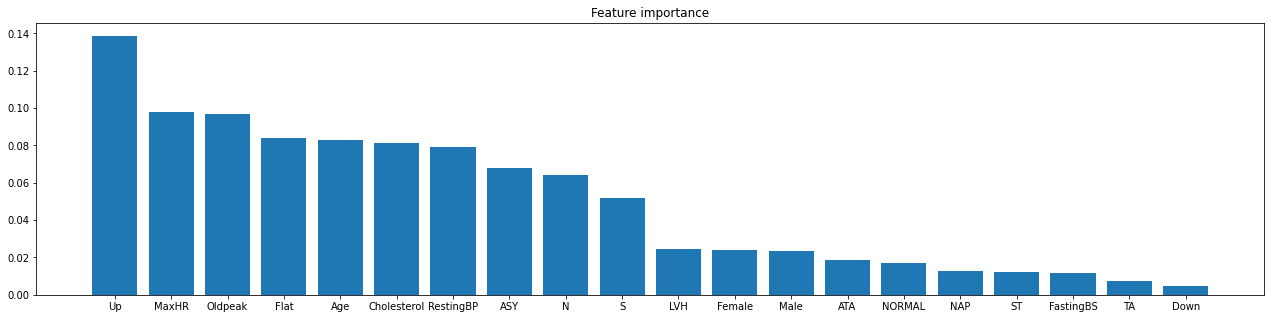

In [192]:
from sklearn.feature_selection import SelectFromModel
import numpy as np

sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)
index = np.argsort(sfm.estimator_.feature_importances_)[::-1]
plt.figure(figsize=(22, 5))
plt.title('Feature importance')
plt.bar(X_train.columns[index], sfm.estimator_.feature_importances_[index])
plt.show()